<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Madhumita_LinearRegression_Intermediate_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression**

---



**1.Import required libraries**

In [1]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# to split data to training and validation dataset
from sklearn.model_selection import train_test_split

# linear regression model
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn import metrics

#Creation of Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced statistics of the linear regression model
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant

#Outlier analysis
from scipy.stats import zscore

#Random forest
from sklearn.ensemble import RandomForestRegressor

#XGBoost
from xgboost import XGBClassifier

#Accuracy score
from sklearn.metrics import accuracy_score

#Label encoder for XG Boost
from sklearn.preprocessing import LabelEncoder



**2.Read/Extract data**

In [2]:
wind_DS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
wind_DS.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


**Perform Descriptive Analytics / Data Exploration**

Distribution of target variable

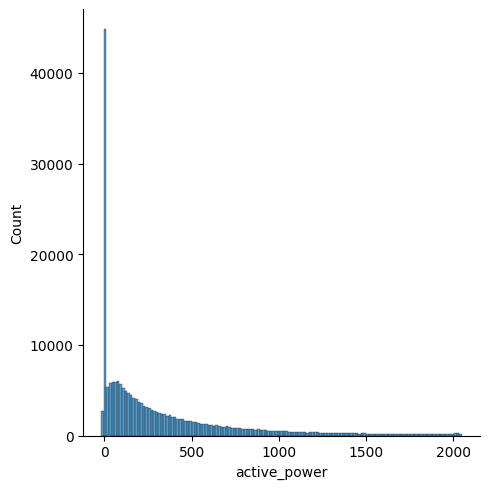

In [ ]:
sns.displot(wind_DS['active_power'])

Observation : The target active_power is normally distributed. We can see lot of data with 0 values.

Create Heatmap to analyse data

<ipython-input-4-70b1a1d11720>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wind_DS.corr(),annot=True)


Text(0.5, 1.0, 'Wind Turbine Active Power Heatmap')

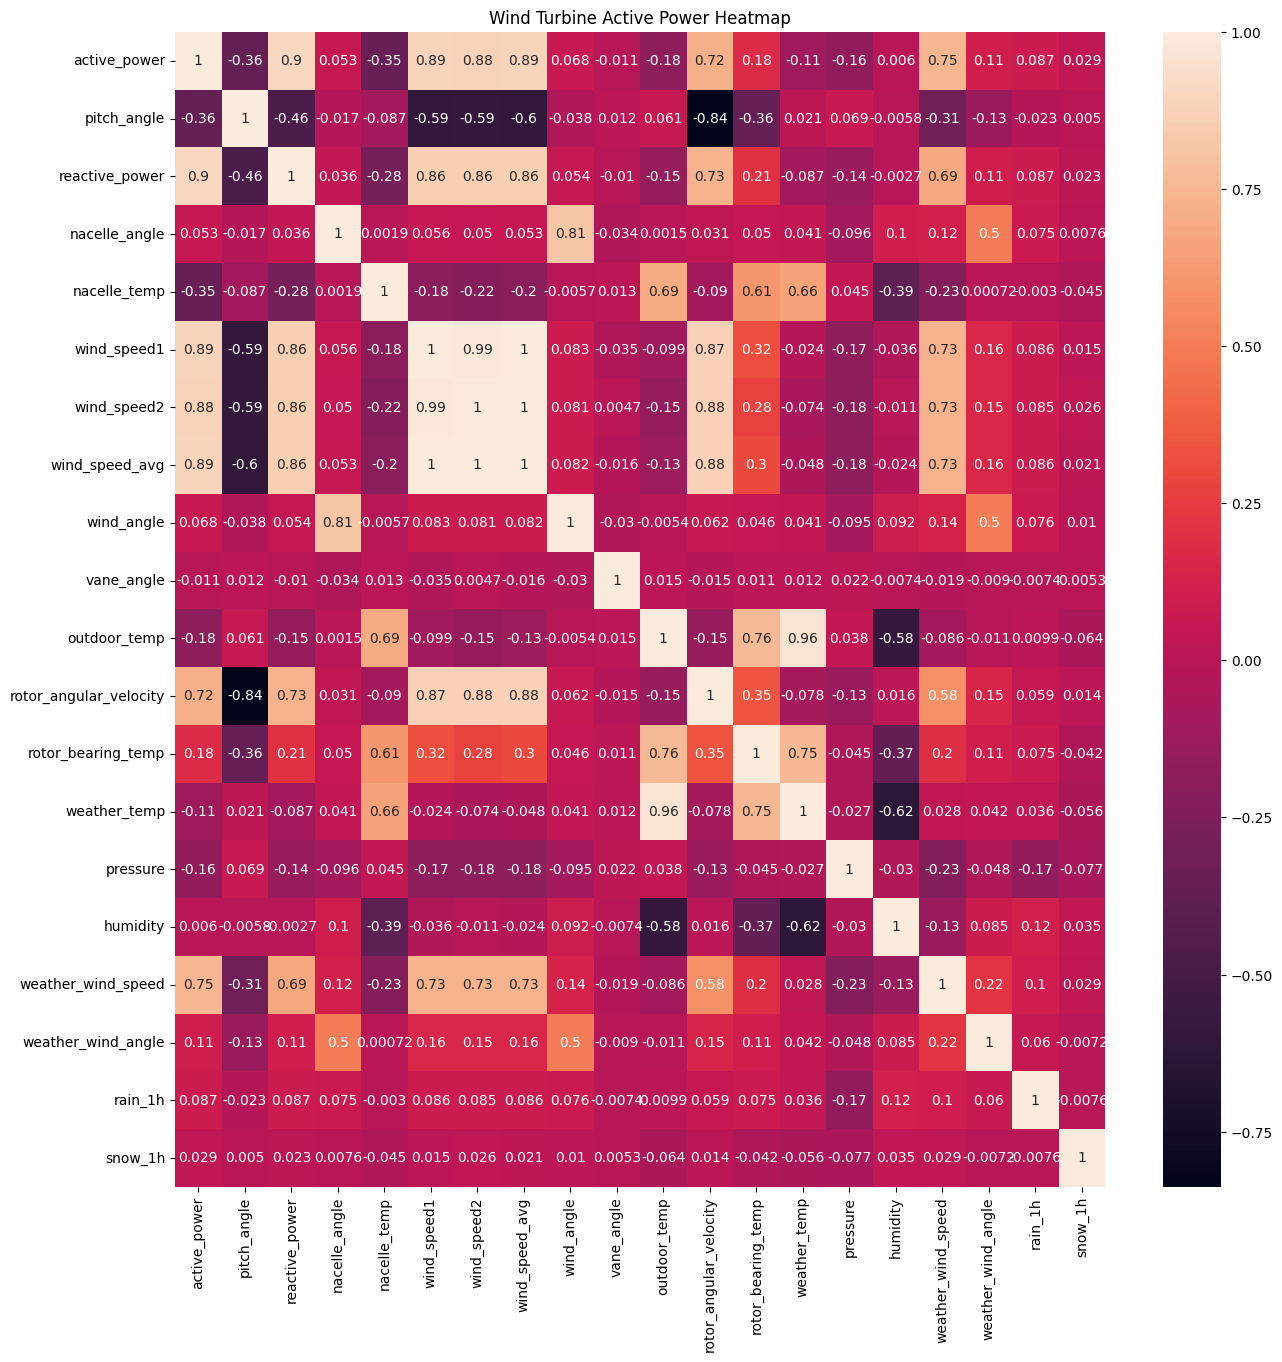

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(wind_DS.corr(),annot=True)
plt.title('Wind Turbine Active Power Heatmap')

**3.Defining feature X and target Y**


*   A subset of features were considered based on the analysis of the heat map



In [3]:
#X = wind_DS[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']



**4.Dividing data into training and vaidation data set**

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

**5.Implementing the linear regression**

In [ ]:
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
wind_lm = OLS(train_y, train_X).fit()

**6.Prediction on the test set**

In [ ]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_lm.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: 0         3.650708
1         3.964192
2         5.194454
3         5.352404
4         3.777697
           ...    
52223     9.651684
52224     2.442501
52225     5.441168
52226    14.440192
52227    14.686494
Length: 52228, dtype: float64


7.Creation of submission dataset

In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,3.650708
1,1,3.964192
2,2,5.194454
3,3,5.352404
4,4,3.777697


**8.Creation of the csv file for submission**

In [ ]:
submission_MX.to_csv("active_power_submission.csv", index=False)

**9.Actual value vs Predicted value for the training data set**

In [ ]:
y_predict = wind_lm.predict(test_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_lr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_lr_dif.head()

Prediction of test set: 186813   -0.137643
45433     3.109544
64742    -0.430717
151113   -0.386672
24054    -1.177911
            ...   
159293   -0.820252
78013    -0.098700
186370   -1.022518
144587   -1.186018
182990    0.321015
Length: 62673, dtype: float64


,Actual value,Predicted value
186813,-0.340783,-0.137643
45433,3.409895,3.109544
64742,-0.554498,-0.430717
151113,-0.415198,-0.386672
24054,-0.781653,-1.177911


**10.Metrics**

In [ ]:
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
#For more detailed summary of the model using statmodel
print(wind_lm.summary())


R squared: 90.09
Mean Absolute Error: 0.23366361087119483
Mean Square Error: 0.09881837754796333
Root Mean Square Error: 0.3143539049351277
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          2.653e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:12:49   Log-Likelihood:                         -38592.
No. Observations:              146237   AIC:                                  7.719e+04
Df Residuals:                  146232   BIC:                                  7.724e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                               

Observation : We can see that the Squared error value is too high and we will need to reduce it further with an alternative approach.

Residual Analysis

<Figure size 800x600 with 0 Axes>

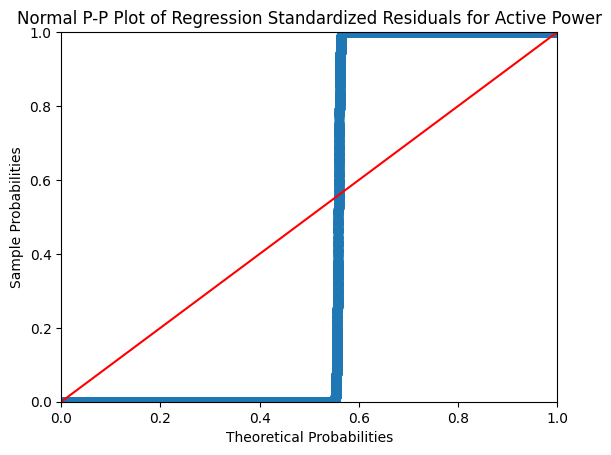

In [ ]:
wind_lm_resid = wind_lm.resid
wind_lm_probplot = sm.ProbPlot(wind_lm_resid)
plt.figure(figsize=(8,6))
wind_lm_probplot.ppplot(line='45')
plt.title('Normal P-P Plot of Regression Standardized Residuals for Active Power')
plt.show()

Observation: The residuals are not normally distributed.

Test of Homoscedasticity

Text(0, 0.5, 'Standardized residuals')

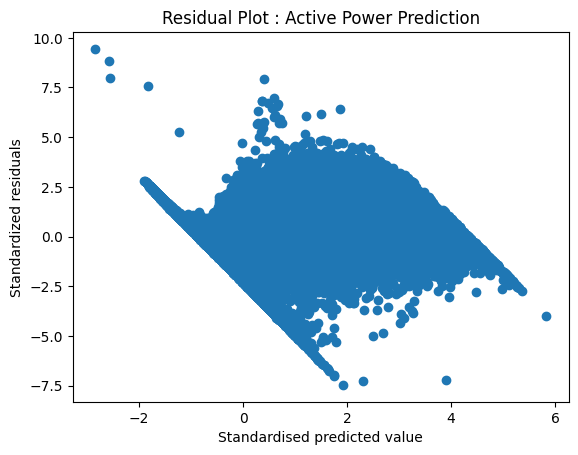

In [ ]:
def get_standardized_values(vals): return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(wind_lm.fittedvalues), get_standardized_values(wind_lm_resid))
plt.title('Residual Plot : Active Power Prediction')
plt.xlabel('Standardised predicted value')
plt.ylabel('Standardized residuals')

Observation : The residuals do not have a constant variance across different values of the predicted value. So there is heteroscedasticity.

Outlier analysis

In [ ]:
#Find zscore
wind_DS['z_score_active_power'] = zscore(wind_DS.active_power)
wind_DS[(wind_DS.z_score_active_power > 3.0) | (wind_DS.z_score_active_power < -3.0)]


,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h,z_score_active_power
43,1719.0699,2013-01-01 07:10:00,0.98,129.630000,290.390010,19.889999,11.32,11.50,11.41,291.700010,...,17.160000,26.420000,5.88,1009.0,93.0,8.23,200.0,1.1,0.0,3.243675
44,1638.0800,2013-01-01 07:20:00,0.27,133.600010,290.390010,14.770000,10.94,11.12,11.03,292.420010,...,17.150000,26.379999,5.88,1009.0,93.0,8.23,200.0,1.1,0.0,3.054031
4021,1699.3600,2013-01-28 22:20:00,0.03,136.570010,292.590000,16.330000,10.59,10.74,10.67,292.810000,...,17.150000,25.629999,4.61,1019.0,81.0,9.77,200.0,0.0,0.0,3.197522
4024,1684.3199,2013-01-28 22:50:00,0.05,150.970000,292.590000,11.670000,10.84,11.15,11.00,297.470000,...,17.150000,25.299999,4.61,1019.0,81.0,9.77,200.0,0.0,0.0,3.162305
4025,1619.0400,2013-01-28 23:00:00,0.07,151.770000,292.590000,11.900000,10.52,10.81,10.67,296.820010,...,17.150000,25.440001,4.62,1020.0,81.0,8.75,200.0,0.0,0.0,3.009447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204273,1958.5100,2016-11-28 23:30:00,3.04,153.480000,47.439999,5.940000,12.00,11.84,11.92,51.029999,...,17.180000,22.469999,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.804341
204274,1908.7200,2016-11-28 23:40:00,3.05,146.630000,47.439999,5.880000,12.00,11.76,11.88,49.549999,...,17.170000,22.590000,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.687754
204275,1659.3800,2016-11-28 23:50:00,0.07,128.910000,47.439999,5.360000,10.65,10.41,10.53,48.139999,...,17.150000,22.590000,-0.63,1025.0,64.0,8.23,90.0,0.0,0.0,3.103906
204280,1631.9399,2016-11-29 00:40:00,-0.04,123.640000,47.439999,12.970000,10.74,10.37,10.56,43.779999,...,17.150000,22.639999,-1.31,1025.0,64.0,6.69,90.0,0.0,0.0,3.039653


Observation : There are a lot of Outliers in the dataset.

Text(0.5, 1.0, 'Box Plot of Active Power')

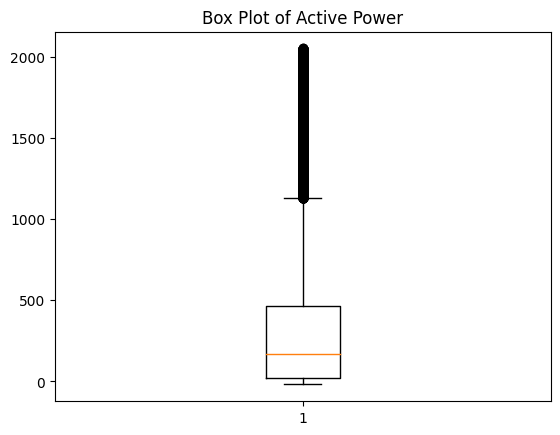

In [ ]:
plt.boxplot(wind_DS['active_power'])
plt.title('Box Plot of Active Power')

Observation : The boxplot above shows a lot of outliers in the data in bold black color.

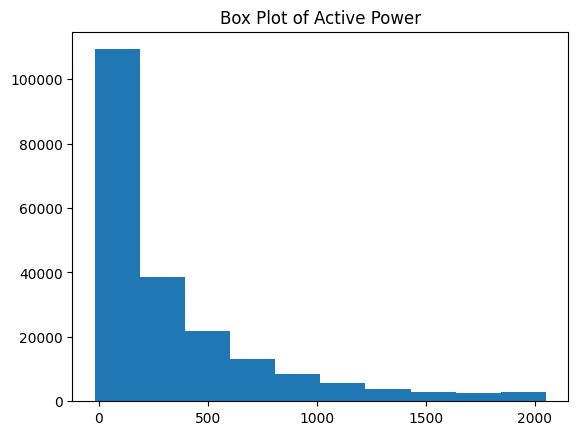

In [ ]:
plt.hist(wind_DS['active_power'])
plt.title('Box Plot of Active Power')
plt.show()

Observation: The Histogram above also has a lot of outliers in the range of 1500 to 2000.

Clipping method : To remove outliers - Negative result: The score decreased and the error increased.

In [ ]:
percentiles = wind_DS['active_power'].quantile([0.01,0.99]).values
wind_DS['active_power'] = np.clip(wind_DS['active_power'],percentiles[0],percentiles[1])
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
y_predict = wind_lm.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_lr.score(X,y)


R squared: 89.92
Mean Absolute Error: 113.102811098832
Mean Square Error: 21500.276315025683
Root Mean Square Error: 146.62972520954162


0.899210154430253

**Random forest regressor**

In [ ]:
wind_RF= RandomForestRegressor(n_estimators=100, random_state=0)
wind_RF.fit(X,y)

RandomForestRegressor(random_state=0)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_predict = wind_RF.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_RF.score(X,y)

R squared: 90.09
Mean Absolute Error: 0.009796348347567454
Mean Square Error: 0.0004502001977076696
Root Mean Square Error: 0.021217921616116638


0.999542327917965

In [ ]:
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_regr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_regr_dif.head()

Prediction of test set: [-0.33322331  3.41777001 -0.55099971 ... -0.78358537 -0.78353549
  0.20758723]


,Actual value,Predicted value
0,-0.340783,-0.333223
1,3.409895,3.417770
2,-0.554498,-0.551000
3,-0.415198,-0.418037
4,-0.781653,-0.781665


In [ ]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_RF.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [2.58368842 3.51499412 2.64296475 ... 2.58584172 1.62023578 2.58693921]


In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,2.583688
1,1,3.514994
2,2,2.642965
3,3,2.729304
4,4,3.444744


In [ ]:
submission_MX.to_csv("active_power_submission_v4.csv", index=False)

XG Boost algorithm

In [ ]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
wind_XG = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', device='gpu', device_ordinal=0) #eta = 0.01,gamma = 10

In [ ]:
wind_XG.fit(train_X,train_y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "device_ordinal", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoostError: ignored

Not possible to execute XGBoost with available GPU as the required memory capacity is too high.

Score on training set

In [ ]:
wind_XG.fit(train_X,train_y)
y_predict = wind_XG.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_XG.score(X,y)

Gradient Descent algorithm

Standardise X and Y

In [ ]:
y = np.array((y - y.mean())/y.std())
X = X.apply(lambda rec: (rec-rec.mean()) / rec.std(), axis = 0)

Random initialisation of the bias and weights

In [ ]:
import random
#dim - number of weights to be initialised besides the bias
def initialize (dim):
  np.random.seed(seed=42)
  random.seed(42)
  #Initialise the bias
  b = random.random()
  #Initialise the weights
  w = np.random.rand(dim)
  return b,w

Initialising the bias and weights for the 5 input variables

In [ ]:
b, w = initialize( 5 )
print("Bias: ", b, "Weights: ", w)

Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


Predict Y values from the Bias and Weights

In [ ]:
#Inputs:
#b - bias
#w - weights
#X - the input matrix

def predict_y(b, w, X):
  return b + np.matmul(X,w)

Calculate predicted values after initializing Bias and Weights

In [ ]:
b, w = initialize( 5 )
y_hat = predict_y(b, w, X)
y_hat[0:10]


0    1.695873
1    2.089360
2    2.353340
3    2.502944
4    2.518792
5    2.288543
6    1.737339
7    1.425551
8    2.066893
9    2.165631
dtype: float64

Calculate the Cost function

In [ ]:
import math

# y - Actual value of y
# y_hat - predicted value of y
def get_cost( y, y_hat ):
  # Calculating the residuals - difference between actual and predicted values
  y_resid = y - y_hat
  #Matrix multiplication with self will give the square values
  #Then take the sum and divide by number of examples to calculate mean
  return np.sum(np.matmul(y_resid.T, y_resid)) / len(y_resid)

In [ ]:
b, w = initialize(5)
y_hat = predict_y(b,w,X)
get_cost(y, y_hat)

1.1812970068395927

Update the Bias and Weights
x, y - the input and output variables
y_hat - predicted value with current bias and weights
b_0, w_0 - current bias and weights
learning_rate - learning rate to adjust the update step

In [ ]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate) :
  #gradient of bias
  db = (np.sum(y_hat - y)*2)/len(y)
  #gradient of weights
  dw = (np.dot((y_hat - y), x)*2) / len(y)
  #update bias
  b_1 = b_0 - learning_rate * db
  #update beta
  w_1 = w_0 - learning_rate * dw
  #return the new bias and beta values
  return b_1, w_1

In [ ]:
#learning parameter used is 0.01
b, w = initialize(5)
print ("After initialization - Bias: ",b, "Weights: ",w)
y_hat = predict_y(b,w,X)
b, w = update_beta(X,y,y_hat,b,w,0.01)
print("After first update - Bias: ", b, "Weights: ",w)

After initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
After first update - Bias:  0.6266382624887261 Weights:  [0.37963377 0.94467767 0.71912447 0.59273625 0.15052541]


# **Neural networks**

In [7]:
# Imports
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [40]:
#X = wind_DS[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
#X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
X = wind_DS[['wind_speed_avg']]
y = wind_DS['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [41]:

# Scale network input data.
scaler = preprocessing.StandardScaler()
Xn = scaler.fit_transform(X)

# Scale test set.
Xtn = scaler.fit_transform(test_X)  #apply scaling to test data

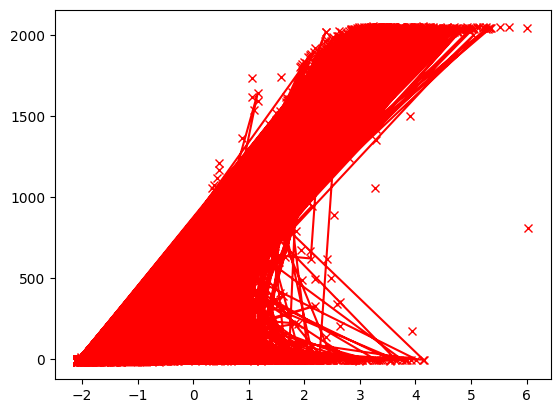

In [42]:
# Plot data.
plt.figure()
plt.plot(Xtn, test_y, 'r')
plt.plot(Xn, y, 'rx')

Train without hidden layers - Simple perceptron model

In [43]:
from sklearn.neural_network import MLPRegressor as mlp  # Import MLP.

In [44]:
net = mlp(hidden_layer_sizes=(), activation='tanh', solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
predictions = net.predict(Xtn)

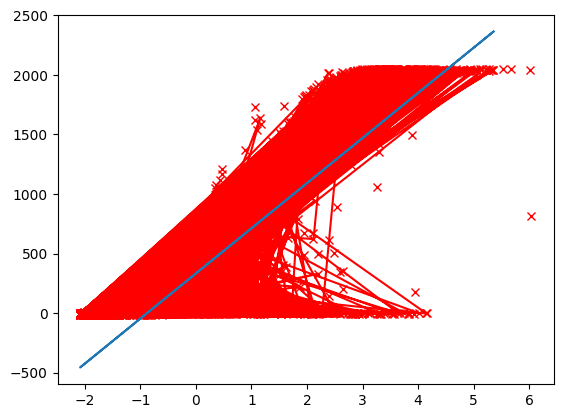

In [45]:
plt.figure()
plt.plot(Xn, y, 'rx')  # Plot training data.
plt.plot(Xtn, test_y, 'r')  # Plot target function.
plt.plot(Xtn, predictions)  # Plot learnt function.

Adding hidden layers

In [48]:
# Hidden units to try.
#numhidden = [1, 2, 5, 10, 15, 20]

# Results on test set / training set.
#restest = np.zeros(len(numhidden))
#restrain = np.zeros(len(numhidden))

# Ideally you would run this multiple times and report average results (or use cross-validation, see later).
#for idx, hidden in enumerate(numhidden):
net = mlp(hidden_layer_sizes=(10,), activation='tanh', solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
net.score(Xtn, test_y)
net.score(Xn, y)

0.9705632488352072

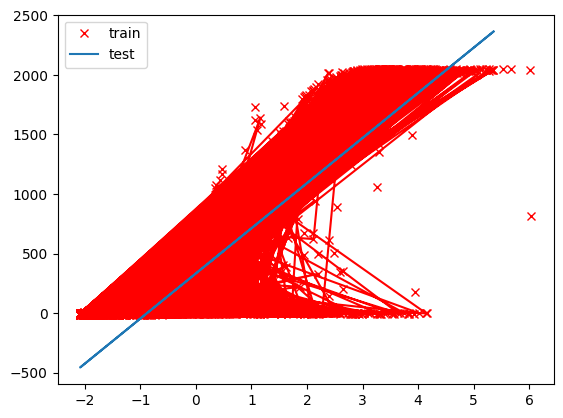

In [49]:
# Plot performance.
plt.figure()
plt.plot(Xn, y, 'rx',label='train')  # Plot training data.
plt.plot(Xtn, test_y, 'r')  # Plot target function.
plt.plot(Xtn, predictions,label='test')  # Plot learnt function.
plt.legend()
plt.show()